# Default Mode Network Analysis--MRI & Plot

Name: Nara Alshawareb

Date: 23/11/2024

Link of MRI source: https://neurosynth.org/analyses/terms/default%20network/


### Initiation cell

In [1]:
import numpy as np
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt 
import os 
import glob
import pandas as pd

### Code that locates MRI data

In [2]:

# To avoid hardcoding the path I use a relative pathname in the glob command
# it searches for any files with the extension .nii (because I used *)
# in the same directory this notebook is saved in 

#this version allows other people to use the code and manually change only the name of the file
MRI_files=glob.glob('*.nii')
for file in MRI_files:
    if file.startswith('anatomical'):
        anatomical_file = file
    if file.startswith('uniformity_test'):
        uniformity_test_file = file


#anatomical_file= glob.glob('anatomical.nii')
#uniformity_test_file=glob.glob('uniformity_test.nii')


### Visualizing the functional data ontop of the anatomical scan

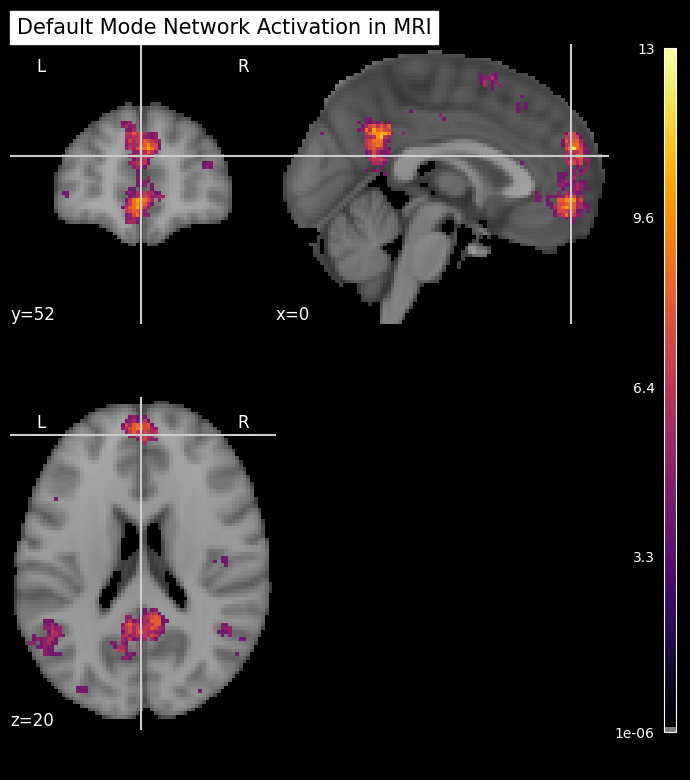

In [3]:
# use nilearn to plot the functional data (uniformity file) 
# ontop of the anatomical scan (anaotmical file)
# adjusted the coordinates to display the x=0, y=52, z=20
# adjusted the display mode, because I didn't like the way 
# the coronal and horizontal slices only had L and R annotations and were very far apart
# so ontop of each other seems like a better organization
# I chose the color inferno and put dim = 1 because it was the nicest contrast
# set vmin=.1 to exclude voxel activations below that

plot = plotting.plot_stat_map(
    uniformity_test_file, 
    bg_img=anatomical_file, 
    cut_coords=(0,52,20), 
    display_mode='tiled',
    title="Default Mode Network Activation in MRI",  
    cmap='inferno',
    dim=1,
    vmin=0.1
    )



### Historgram of the values in the functional data file

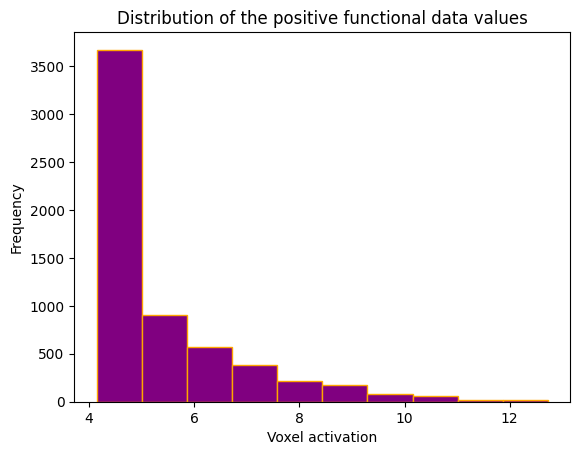

In [4]:
#loading the mri data file into an image
image = nib.load(uniformity_test_file)

#getting the image data from the image
image_data = image.get_fdata()

#converting it to an array so I can use numpy to select the positive values--I realize it works without converting to array but I like numpy
array_image_data= np.array(image_data)

#selecting only the positive values from the image data
positive_only=array_image_data[array_image_data>0]

#plotting a histogram using the positive_only data we selected
fig, ax=plt.subplots(1,1)
ax.axes.hist(positive_only,
             color="purple",
             edgecolor="orange")

#Add a title and x- and y- labels
ax.set_title("Distribution of the positive functional data values")
plt.ylabel("Frequency")
plt.xlabel("Voxel activation")

plt.show()